In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data_Analysis/df_nnz.csv")

In [3]:
df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA2,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity
0,0.0065,1.3763,1,1,2.757,1.071,-0.05,4.00,37.0,3,...,40.50,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0
1,0.0554,0.2643,2,1,2.757,1.071,-0.05,4.00,37.0,3,...,40.50,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0
2,0.0355,8.363,3,1,2.757,1.071,-0.05,4.00,37.0,3,...,52.00,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0
3,0.2277,0.4382,4,1,2.757,1.071,-0.05,4.00,37.0,3,...,52.00,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0
4,0.0173,1.0272,5,1,2.757,1.071,-0.05,4.00,37.0,3,...,40.50,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0.122,1.51E-06,1198,2,2.280,1.350,1.20,7.00,41.4,3,...,45.78,132.13,-1.700000,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0
1126,0.027,0.000252,1199,2,2.280,1.350,1.20,3.00,33.0,1,...,40.50,375.75,-10.800000,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0
1127,0.035,0.000177,1200,2,2.280,1.350,1.20,7.00,33.0,1,...,40.50,375.75,-10.800000,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0
1128,0.163,4.08E-05,1201,2,1.937,0.853,0.78,4.00,42.4,1,...,45.78,30.00,-1.600000,5.992739,0.000000,-0.398299,0.037337,-2.379344,0.999951,0.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Km                  1130 non-null   object 
 1   Vmax                1130 non-null   object 
 2   id                  1130 non-null   int64  
 3   activity            1130 non-null   int64  
 4   X                   1130 non-null   float64
 5   IR                  1130 non-null   float64
 6   pot2                1130 non-null   float64
 7   ph                  1127 non-null   float64
 8   temp                1129 non-null   float64
 9   dstr                1130 non-null   int64  
 10  cryst               1130 non-null   float64
 11  lgCmin              1130 non-null   float64
 12  lgCmax              1130 non-null   float64
 13  Cmin                1130 non-null   float64
 14  Cmax                1130 non-null   float64
 15  lgCconst            1130 non-null   float64
 16  Cconst

In [94]:
def to_numeric_column(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

def counts_quantil(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))
    num_outliers = outliers.sum()
    filtered_data = column[~outliers]

    return num_outliers



def del_quantil(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

    return df

In [95]:
df = to_numeric_column(df, 'Vmax')
df = to_numeric_column(df, 'Km')

In [96]:
df['Vmax'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1130 entries, 0 to 1129
Series name: Vmax
Non-Null Count  Dtype  
--------------  -----  
1059 non-null   float64
dtypes: float64(1)
memory usage: 9.0 KB


In [97]:
df['Km'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1130 entries, 0 to 1129
Series name: Km
Non-Null Count  Dtype  
--------------  -----  
1120 non-null   float64
dtypes: float64(1)
memory usage: 9.0 KB


In [98]:
df = df.dropna(subset=['Vmax', 'Km'], axis =0)
df_nan = df.isna().mean().sort_values(ascending = False)

In [99]:
df_colums = ['ph','Complexity','temp']
nan_rows = df[df[df_colums].isnull().any(axis=1)]

In [100]:
df = df.dropna(axis =0)
df_nan = df.isna().mean().sort_values(ascending = False)

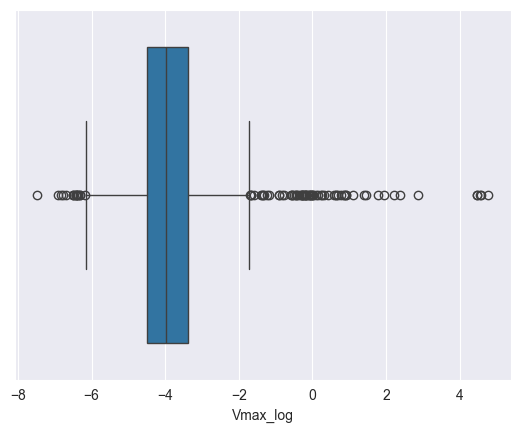

In [101]:
df.loc[:, 'Vmax_log'] = np.log10(df['Vmax'])
sns.boxplot(x=df['Vmax_log'])
plt.show()

In [102]:
df = del_quantil(df, 'Km')
print(counts_quantil(df['Km']))
print(counts_quantil(df['Vmax_log']))

128
58


In [103]:
zero_counts = df.isin([0]).mean().sort_values(ascending = False)

In [104]:
zero_counts

VSA_EState4           0.808105
Complexity            0.805721
EState_VSA6           0.789035
SMR_VSA7              0.686532
PEOE_VSA8             0.660310
PEOE_VSA7             0.654350
PEOE_VSA9             0.634088
EState_VSA4           0.624553
MinAbsEStateIndex     0.558999
VSA_EState8           0.543504
BCUT2D_CHGLO          0.516091
BalabanJ              0.487485
polym                 0.470799
MinEStateIndex        0.467223
TPSA                  0.461263
XLogP                 0.457688
Sufrace               0.436234
MinPartialCharge      0.436234
Kappa2                0.436234
MolWt                 0.430274
Mcoat                 0.424315
Complexity1           0.344458
lgCconst              0.221692
MaxEStateIndex.2      0.177592
Cconst                0.171633
lgCmax                0.095352
lgCcat                0.047676
lgCmin                0.040524
MinPartialCharge.1    0.016687
MaxEStateIndex.1      0.016687
MaxPartialCharge.1    0.016687
cryst                 0.015495
Cmin    

In [105]:
df.dropna(subset=['Cconst'], inplace=True)

In [106]:
df['Cconst'].info()

<class 'pandas.core.series.Series'>
Index: 839 entries, 0 to 1128
Series name: Cconst
Non-Null Count  Dtype  
--------------  -----  
839 non-null    float64
dtypes: float64(1)
memory usage: 13.1 KB


In [107]:
df['Cconst'] = df['Cconst'].replace(0, np.nan)

In [108]:
df['Cconst'].value_counts()

Cconst
1.000       44
100.000     42
0.100       42
10.000      36
0.800       29
            ..
350.000      1
0.140        1
142.828      1
1045.000     1
0.350        1
Name: count, Length: 111, dtype: int64

In [109]:
df_nan = df.isna().mean().sort_values(ascending = False)

In [110]:
df_nan

Cconst                0.171633
Km                    0.000000
Complexity1           0.000000
BalabanJ              0.000000
MinAbsEStateIndex     0.000000
MinEStateIndex        0.000000
EState_VSA6           0.000000
VSA_EState4           0.000000
PEOE_VSA8             0.000000
MinPartialCharge      0.000000
EState_VSA4           0.000000
SMR_VSA7              0.000000
TPSA1                 0.000000
VSA_EState8           0.000000
TPSA2                 0.000000
TPSA                  0.000000
XLogP                 0.000000
MaxEStateIndex.1      0.000000
MaxEStateIndex.2      0.000000
MinPartialCharge.1    0.000000
MaxPartialCharge.1    0.000000
BCUT2D_CHGLO          0.000000
polym                 0.000000
Complexity            0.000000
Kappa2                0.000000
PEOE_VSA9             0.000000
Vmax                  0.000000
lgCmin                0.000000
id                    0.000000
activity              0.000000
X                     0.000000
IR                    0.000000
pot2    

In [111]:
#df['Cconst']. median ()

In [112]:
#df['Cconst'] = df['Cconst'].replace(np.nan, 3.65)

In [113]:
#df

In [114]:
#df.describe()

In [115]:
#df['lgCconst'] = np.log10(df['Cconst'])

In [116]:
#df

In [117]:
#df.describe()

In [118]:
#df

In [119]:
from sklearn.impute import KNNImputer

In [120]:
selected_column = 'Cconst'

In [121]:
imputer = KNNImputer(n_neighbors=2)

In [122]:
df[selected_column] = imputer.fit_transform(df[[selected_column]])

In [123]:
df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
0,0.0065,1.376300,1,1,2.757,1.071,-0.05,4.0,37.0,3,...,37.30,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713
1,0.0554,0.264300,2,1,2.757,1.071,-0.05,4.0,37.0,3,...,37.30,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903
2,0.0355,8.363000,3,1,2.757,1.071,-0.05,4.0,37.0,3,...,37.30,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362
3,0.2277,0.438200,4,1,2.757,1.071,-0.05,4.0,37.0,3,...,37.30,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328
4,0.0173,1.027200,5,1,2.757,1.071,-0.05,4.0,37.0,3,...,37.30,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.0550,0.000467,1197,2,2.280,1.350,1.20,3.0,41.4,3,...,132.13,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-3.330683
1125,0.1220,0.000002,1198,2,2.280,1.350,1.20,7.0,41.4,3,...,132.13,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-5.821023
1126,0.0270,0.000252,1199,2,2.280,1.350,1.20,3.0,33.0,1,...,375.75,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.598599
1127,0.0350,0.000177,1200,2,2.280,1.350,1.20,7.0,33.0,1,...,375.75,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.752027


In [124]:
df['Cconst'].value_counts()

Cconst
166.379937     144
1.000000        44
100.000000      42
0.100000        42
10.000000       36
              ... 
350.000000       1
0.140000         1
142.828000       1
1045.000000      1
0.350000         1
Name: count, Length: 112, dtype: int64

In [125]:
df.describe()

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
count,839.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,1.406910,2.284246e+02,596.144219,1.189511,2.527696,1.206629,0.274352,4.506329,33.330274,2.682956,...,61.975328,16.029653,6.164966,5.012076,-0.358436,-0.040647,-0.979636,149.307192,88.529201,-3.795491
std,2.907154,3.074768e+03,352.986207,0.427106,0.270383,0.179094,0.554609,1.200939,9.300664,0.667759,...,134.680468,37.046987,1.427754,2.422942,0.107470,0.165174,1.030348,941.892328,462.418715,1.343715
min,0.000100,3.400000e-08,1.000000,1.000000,1.830000,0.700000,-1.358000,2.000000,15.000000,1.000000,...,0.000000,-21.400000,0.000000,0.000000,-0.870233,-0.254557,-2.590745,0.000000,0.000000,-7.468521
25%,0.089650,3.120000e-05,291.500000,1.000000,2.280000,1.084000,-0.078800,4.000000,25.000000,3.000000,...,0.000000,0.000000,5.992739,5.992739,-0.398299,-0.254557,-2.048433,0.000000,0.000000,-4.505845
50%,0.269000,1.020000e-04,587.000000,1.000000,2.579000,1.217200,0.051900,4.000000,31.000000,3.000000,...,20.310000,0.000000,5.992739,6.000000,-0.398299,0.037337,0.000000,0.621236,0.000000,-3.991400
75%,0.952500,3.535000e-04,888.500000,1.000000,2.750000,1.336000,0.619000,4.500000,40.000000,3.000000,...,66.480000,5.400000,6.000000,6.000000,-0.254557,0.037337,0.000000,1.000032,0.000000,-3.451632
max,16.540000,5.988500e+04,1201.000000,4.000000,3.170000,1.710000,1.690000,9.000000,90.000000,3.000000,...,1154.410000,153.000000,12.142874,11.503714,0.000000,1.000000,0.000000,11696.537820,5020.000000,4.777318


In [126]:
df['lgCconst'] = np.log10(df['Cconst'])

In [127]:
df.describe()

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
count,839.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,1.406910,2.284246e+02,596.144219,1.189511,2.527696,1.206629,0.274352,4.506329,33.330274,2.682956,...,61.975328,16.029653,6.164966,5.012076,-0.358436,-0.040647,-0.979636,149.307192,88.529201,-3.795491
std,2.907154,3.074768e+03,352.986207,0.427106,0.270383,0.179094,0.554609,1.200939,9.300664,0.667759,...,134.680468,37.046987,1.427754,2.422942,0.107470,0.165174,1.030348,941.892328,462.418715,1.343715
min,0.000100,3.400000e-08,1.000000,1.000000,1.830000,0.700000,-1.358000,2.000000,15.000000,1.000000,...,0.000000,-21.400000,0.000000,0.000000,-0.870233,-0.254557,-2.590745,0.000000,0.000000,-7.468521
25%,0.089650,3.120000e-05,291.500000,1.000000,2.280000,1.084000,-0.078800,4.000000,25.000000,3.000000,...,0.000000,0.000000,5.992739,5.992739,-0.398299,-0.254557,-2.048433,0.000000,0.000000,-4.505845
50%,0.269000,1.020000e-04,587.000000,1.000000,2.579000,1.217200,0.051900,4.000000,31.000000,3.000000,...,20.310000,0.000000,5.992739,6.000000,-0.398299,0.037337,0.000000,0.621236,0.000000,-3.991400
75%,0.952500,3.535000e-04,888.500000,1.000000,2.750000,1.336000,0.619000,4.500000,40.000000,3.000000,...,66.480000,5.400000,6.000000,6.000000,-0.254557,0.037337,0.000000,1.000032,0.000000,-3.451632
max,16.540000,5.988500e+04,1201.000000,4.000000,3.170000,1.710000,1.690000,9.000000,90.000000,3.000000,...,1154.410000,153.000000,12.142874,11.503714,0.000000,1.000000,0.000000,11696.537820,5020.000000,4.777318


In [128]:
df['Cconst'].value_counts()

Cconst
166.379937     144
1.000000        44
100.000000      42
0.100000        42
10.000000       36
              ... 
350.000000       1
0.140000         1
142.828000       1
1045.000000      1
0.350000         1
Name: count, Length: 112, dtype: int64

In [129]:
df['lgCconst'].value_counts()

lgCconst
 2.221101    144
 0.000000     44
 2.000000     42
-1.000000     42
 1.000000     36
            ... 
 2.544068      1
-0.853872      1
 2.154813      1
 3.019116      1
-0.455932      1
Name: count, Length: 112, dtype: int64

<Axes: >

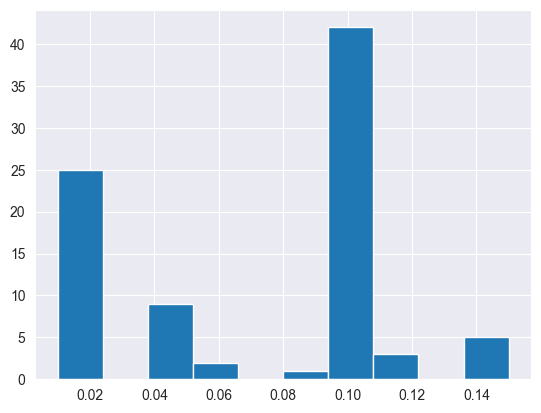

In [130]:
q1 = df['Cconst'].quantile(0)
q2 = df['Cconst'].quantile(0.1)
df[df['Cconst'].between(q1,q2)]['Cconst'].hist()

In [131]:
df['Complexity1']

0       226.0
1       226.0
2         0.0
3         0.0
4       226.0
        ...  
1124    226.0
1125    226.0
1126    226.0
1127    226.0
1128    226.0
Name: Complexity1, Length: 839, dtype: float64

In [132]:
min_val = df['Sufrace'].min()
max_val = df['Sufrace'].max()
df['Sufrace_change'] = (df['Sufrace'] - min_val) / (max_val - min_val)


In [133]:
df['Complexity1']

0       226.0
1       226.0
2         0.0
3         0.0
4       226.0
        ...  
1124    226.0
1125    226.0
1126    226.0
1127    226.0
1128    226.0
Name: Complexity1, Length: 839, dtype: float64

In [134]:
df['Mcoat'].value_counts()

Mcoat
0.000        356
192.120       53
55000.000     46
364.450       34
282.470       22
            ... 
26300.000      1
203.826        1
140.190        1
288.370        1
203.360        1
Name: count, Length: 107, dtype: int64

In [135]:
df['Mcoat'] = df['Mcoat'].replace(0, np.nan)   

In [136]:
df_filled = df.fillna(df**2)

In [137]:
df_filled

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log,Sufrace_change
0,0.0065,1.376300,1,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713,0.2
1,0.0554,0.264300,2,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903,0.2
2,0.0355,8.363000,3,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362,0.2
3,0.2277,0.438200,4,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328,0.2
4,0.0173,1.027200,5,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.0550,0.000467,1197,2,2.280,1.350,1.20,3.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-3.330683,0.2
1125,0.1220,0.000002,1198,2,2.280,1.350,1.20,7.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-5.821023,0.2
1126,0.0270,0.000252,1199,2,2.280,1.350,1.20,3.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.598599,1.0
1127,0.0350,0.000177,1200,2,2.280,1.350,1.20,7.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.752027,1.0


In [138]:
df['Mcoat'].value_counts()

Mcoat
192.120      53
55000.000    46
364.450      34
282.470      22
62.070       19
             ..
110.100       1
14000.000     1
26300.000     1
203.826       1
203.360       1
Name: count, Length: 106, dtype: int64

In [139]:
df['MinAbsEStateIndex'].value_counts()

MinAbsEStateIndex
0.000000    469
0.208333    104
0.125000     40
0.331507     32
1.144213     22
1.000000     19
0.671343     18
0.087083     10
0.882716     10
0.062261      8
0.833333      7
0.025619      7
0.583333      5
0.761515      5
0.056866      4
0.597222      4
0.862284      4
0.189815      4
1.046760      4
1.500000      3
0.250000      3
1.250000      3
1.263117      2
1.875000      2
0.052846      2
0.083333      2
0.946759      2
0.731481      2
0.598053      2
0.020210      2
0.525787      2
0.279491      2
0.725818      2
0.520370      2
0.967593      2
1.145833      2
0.070278      2
0.277778      2
0.141944      2
0.004355      2
0.003686      2
0.094907      2
0.407860      1
0.294682      1
0.532407      1
0.226435      1
0.840345      1
1.187500      1
0.347222      1
0.042587      1
0.049447      1
0.076389      1
0.806667      1
0.025463      1
0.428299      1
0.287037      1
Name: count, dtype: int64

In [140]:
df['MinAbsEStateIndex'] = df['MinAbsEStateIndex'].replace(0, np.nan)

In [141]:
df['MinAbsEStateIndex'].value_counts()

MinAbsEStateIndex
0.208333    104
0.125000     40
0.331507     32
1.144213     22
1.000000     19
0.671343     18
0.882716     10
0.087083     10
0.062261      8
0.833333      7
0.025619      7
0.761515      5
0.583333      5
0.056866      4
0.862284      4
0.189815      4
1.046760      4
0.597222      4
1.250000      3
0.250000      3
1.500000      3
1.263117      2
1.875000      2
0.052846      2
0.083333      2
0.946759      2
0.731481      2
0.598053      2
0.020210      2
0.525787      2
0.279491      2
0.725818      2
0.520370      2
0.967593      2
1.145833      2
0.070278      2
0.277778      2
0.141944      2
0.004355      2
0.003686      2
0.094907      2
0.407860      1
0.294682      1
0.532407      1
0.226435      1
0.840345      1
1.187500      1
0.347222      1
0.042587      1
0.049447      1
0.076389      1
0.806667      1
0.025463      1
0.428299      1
0.287037      1
Name: count, dtype: int64

In [142]:
df_nan = df.isna().mean().sort_values(ascending = False)

In [143]:
df_nan

MinAbsEStateIndex     0.558999
Mcoat                 0.424315
Km                    0.000000
TPSA1                 0.000000
MinEStateIndex        0.000000
EState_VSA6           0.000000
VSA_EState4           0.000000
PEOE_VSA8             0.000000
MinPartialCharge      0.000000
EState_VSA4           0.000000
SMR_VSA7              0.000000
Complexity1           0.000000
TPSA2                 0.000000
Kappa2                0.000000
TPSA                  0.000000
XLogP                 0.000000
MaxEStateIndex.1      0.000000
MaxEStateIndex.2      0.000000
MinPartialCharge.1    0.000000
MaxPartialCharge.1    0.000000
BCUT2D_CHGLO          0.000000
polym                 0.000000
Complexity            0.000000
Vmax_log              0.000000
BalabanJ              0.000000
VSA_EState8           0.000000
Vmax                  0.000000
PEOE_VSA9             0.000000
id                    0.000000
activity              0.000000
X                     0.000000
IR                    0.000000
pot2    

In [144]:
df_filled = df.fillna(df**2)

In [145]:
df_filled

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log,Sufrace_change
0,0.0065,1.376300,1,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713,0.2
1,0.0554,0.264300,2,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903,0.2
2,0.0355,8.363000,3,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362,0.2
3,0.2277,0.438200,4,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328,0.2
4,0.0173,1.027200,5,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.0550,0.000467,1197,2,2.280,1.350,1.20,3.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-3.330683,0.2
1125,0.1220,0.000002,1198,2,2.280,1.350,1.20,7.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-5.821023,0.2
1126,0.0270,0.000252,1199,2,2.280,1.350,1.20,3.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.598599,1.0
1127,0.0350,0.000177,1200,2,2.280,1.350,1.20,7.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.752027,1.0


In [146]:
df['MinAbsEStateIndex'].value_counts()

MinAbsEStateIndex
0.208333    104
0.125000     40
0.331507     32
1.144213     22
1.000000     19
0.671343     18
0.882716     10
0.087083     10
0.062261      8
0.833333      7
0.025619      7
0.761515      5
0.583333      5
0.056866      4
0.862284      4
0.189815      4
1.046760      4
0.597222      4
1.250000      3
0.250000      3
1.500000      3
1.263117      2
1.875000      2
0.052846      2
0.083333      2
0.946759      2
0.731481      2
0.598053      2
0.020210      2
0.525787      2
0.279491      2
0.725818      2
0.520370      2
0.967593      2
1.145833      2
0.070278      2
0.277778      2
0.141944      2
0.004355      2
0.003686      2
0.094907      2
0.407860      1
0.294682      1
0.532407      1
0.226435      1
0.840345      1
1.187500      1
0.347222      1
0.042587      1
0.049447      1
0.076389      1
0.806667      1
0.025463      1
0.428299      1
0.287037      1
Name: count, dtype: int64

In [147]:
df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log,Sufrace_change
0,0.0065,1.376300,1,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713,0.2
1,0.0554,0.264300,2,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903,0.2
2,0.0355,8.363000,3,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362,0.2
3,0.2277,0.438200,4,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328,0.2
4,0.0173,1.027200,5,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.0550,0.000467,1197,2,2.280,1.350,1.20,3.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-3.330683,0.2
1125,0.1220,0.000002,1198,2,2.280,1.350,1.20,7.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-5.821023,0.2
1126,0.0270,0.000252,1199,2,2.280,1.350,1.20,3.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.598599,1.0
1127,0.0350,0.000177,1200,2,2.280,1.350,1.20,7.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.752027,1.0


In [148]:
df['MinAbsEStateIndex'] = df['MinAbsEStateIndex'].replace(np.nan, 0)

In [149]:
df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log,Sufrace_change
0,0.0065,1.376300,1,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713,0.2
1,0.0554,0.264300,2,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903,0.2
2,0.0355,8.363000,3,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362,0.2
3,0.2277,0.438200,4,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328,0.2
4,0.0173,1.027200,5,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.0550,0.000467,1197,2,2.280,1.350,1.20,3.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-3.330683,0.2
1125,0.1220,0.000002,1198,2,2.280,1.350,1.20,7.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-5.821023,0.2
1126,0.0270,0.000252,1199,2,2.280,1.350,1.20,3.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.598599,1.0
1127,0.0350,0.000177,1200,2,2.280,1.350,1.20,7.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.752027,1.0


In [150]:
df['id'] = np.square(df['id'])

In [151]:
df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log,Sufrace_change
0,0.0065,1.376300,1,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713,0.2
1,0.0554,0.264300,4,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903,0.2
2,0.0355,8.363000,9,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362,0.2
3,0.2277,0.438200,16,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328,0.2
4,0.0173,1.027200,25,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.0550,0.000467,1432809,2,2.280,1.350,1.20,3.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-3.330683,0.2
1125,0.1220,0.000002,1435204,2,2.280,1.350,1.20,7.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-5.821023,0.2
1126,0.0270,0.000252,1437601,2,2.280,1.350,1.20,3.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.598599,1.0
1127,0.0350,0.000177,1440000,2,2.280,1.350,1.20,7.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.752027,1.0


In [152]:
df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log,Sufrace_change
0,0.0065,1.376300,1,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713,0.2
1,0.0554,0.264300,4,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903,0.2
2,0.0355,8.363000,9,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362,0.2
3,0.2277,0.438200,16,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328,0.2
4,0.0173,1.027200,25,1,2.757,1.071,-0.05,4.0,37.0,3,...,6.5,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.0550,0.000467,1432809,2,2.280,1.350,1.20,3.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-3.330683,0.2
1125,0.1220,0.000002,1435204,2,2.280,1.350,1.20,7.0,41.4,3,...,-1.7,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0,-5.821023,0.2
1126,0.0270,0.000252,1437601,2,2.280,1.350,1.20,3.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.598599,1.0
1127,0.0350,0.000177,1440000,2,2.280,1.350,1.20,7.0,33.0,1,...,-10.8,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0,-3.752027,1.0


In [153]:
column_description = df['MinEStateIndex'].describe()

In [154]:
column_description

count    839.000000
mean      -0.595900
std        1.189193
min       -6.086967
25%       -1.083333
50%        0.000000
75%        0.000000
max        1.875000
Name: MinEStateIndex, dtype: float64

In [155]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [156]:
df['MinEStateIndex'] = df['MinEStateIndex'].apply(sigmoid)

In [157]:
column_description = df['MinEStateIndex'].describe()

In [158]:
column_description

count    839.000000
mean       0.401700
std        0.185080
min        0.002267
25%        0.252876
50%        0.500000
75%        0.500000
max        0.867036
Name: MinEStateIndex, dtype: float64

In [159]:
# sns.displot(df, x="Vmax_log", hue="")

In [160]:
# df.info()

In [161]:
import matplotlib.pyplot as plt

<Axes: xlabel='ph', ylabel='Km'>

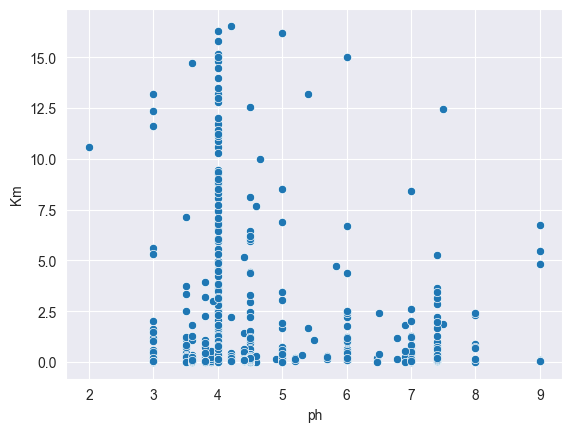

In [162]:
sns.scatterplot(x='ph', y='Km', data=df)

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

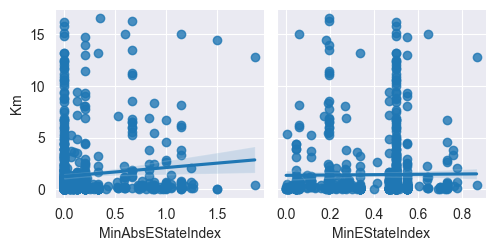

In [172]:
sns.pairplot(df, x_vars=['MinAbsEStateIndex', 'MinEStateIndex'], y_vars=['Km'], kind='reg')
plt.show()

In [174]:
df['MinEStateIndex_group'] = pd.qcut(df['MinEStateIndex'],10,duplicates='drop')
df['MinAbsEStateIndex_group'] = pd.qcut(df['MinAbsEStateIndex'],10,duplicates='drop')


In [176]:
df.groupby('MinAbsEStateIndex_group',dropna=False)['Km'].agg(['count','mean'])

C:\Users\user\AppData\Local\Temp\ipykernel_1824\690676126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MinAbsEStateIndex_group',dropna=False)['Km'].agg(['count','mean'])


,count,mean
MinAbsEStateIndex_group,,
"(-0.001, 0.0833]",504,1.265426
"(0.0833, 0.208]",162,1.336144
"(0.208, 0.278]",6,0.366667
"(0.278, 0.812]",83,2.224646
"(0.812, 1.875]",84,1.658593
